### link of dataset :https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler


# read csv file & Exploratory Data Analysis 

In [2]:
dataset = pd.read_csv("car_price_prediction.csv")
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
dataset.shape

(19237, 18)

In [4]:
dataset.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [5]:
dataset.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


#### Remove Km for Mileage coulmn 

In [6]:
#Remove "km" from the end of each value in the 'Mileage' column
dataset['Mileage'] = dataset['Mileage'].str.rstrip('km')


In [7]:
dataset.head(1)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [8]:
# Convert the column to numeric values
dataset['Mileage'] = pd.to_numeric(dataset['Mileage'], errors='coerce')
dataset['Levy'] = pd.to_numeric(dataset['Levy'], errors='coerce')
dataset['Engine volume'] = pd.to_numeric(dataset['Engine volume'], errors='coerce')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     17306 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [10]:
dataset.Model.unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

In [11]:
dataset.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [12]:
features_to_drop = ['Manufacturer','Model','Wheel','Color','Doors']
dataset = dataset.drop(columns=features_to_drop)

In [16]:
dataset.isna().sum()

ID                     0
Price                  0
Levy                5819
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume       1931
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Airbags                0
dtype: int64

In [18]:
features_to_drop = ['Levy']
dataset = dataset.drop(columns=features_to_drop)

In [19]:
dataset.isnull().sum()

ID                     0
Price                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume       1931
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Airbags                0
dtype: int64

# fill non with mean

In [20]:
# Calculate the mean of each column
mean_values = dataset['Engine volume'].mean()

# Replace NaN values with the mean of each column
dataset['Engine volume'].fillna(mean_values, inplace=True)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Prod. year        19237 non-null  int64  
 3   Category          19237 non-null  object 
 4   Leather interior  19237 non-null  object 
 5   Fuel type         19237 non-null  object 
 6   Engine volume     19237 non-null  float64
 7   Mileage           19237 non-null  int64  
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Airbags           19237 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


In [22]:
brand_sum =dataset.groupby('Category')['Price'].sum()

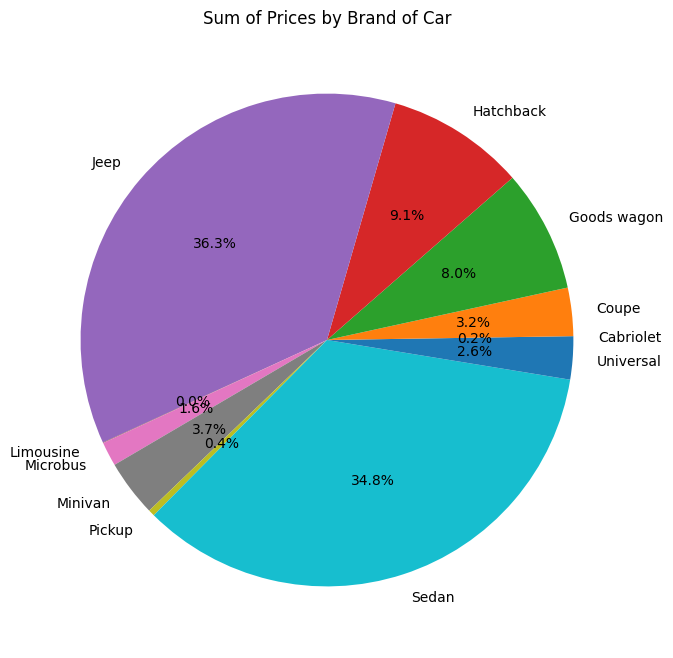

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(brand_sum,labels=brand_sum.index,autopct='%1.1f%%')
plt.title('Sum of Prices by Brand of Car')
plt.show()

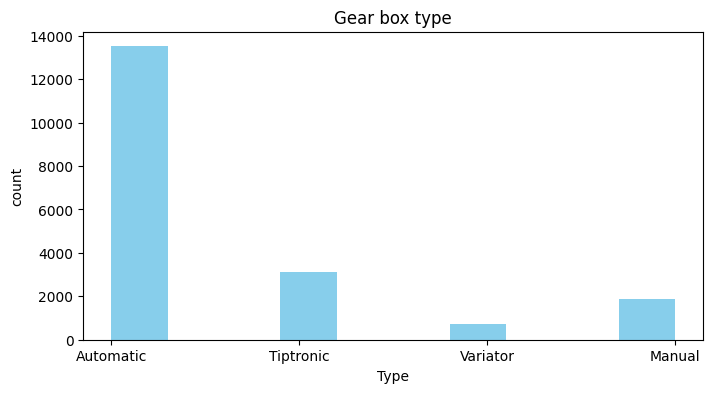

In [26]:
plt.figure(figsize=(8,4))
plt.hist(dataset['Gear box type'],color='skyblue')
plt.xlabel('Type')
plt.ylabel('count')
plt.title('Gear box type')
plt.show()

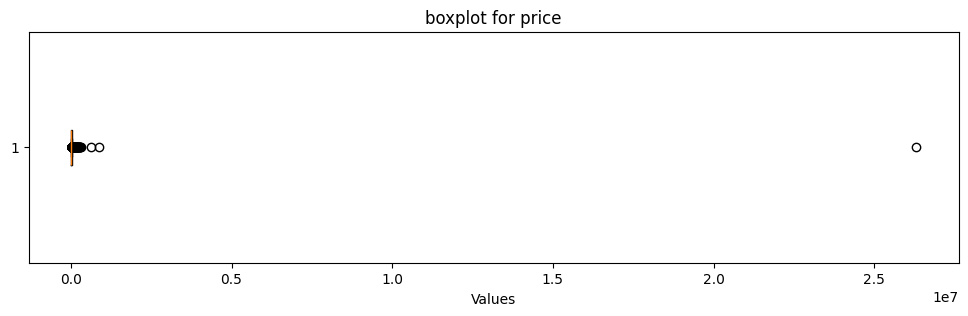

In [27]:
plt.figure(figsize=(12, 3))
plt.boxplot(dataset['Price'], vert=False)  # vert=False for horizontal boxplot
plt.title('boxplot for price')
plt.xlabel('Values')
plt.show()

# solve problem outliers in column price

In [28]:
# Detect outliers using the IQR method
Q1 = dataset['Price'].quantile(0.25)
Q3 = dataset['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and replace outliers
outliers = (dataset['Price'] < lower_bound) | (dataset['Price'] > upper_bound)
mean_without_outliers = dataset.loc[~outliers, 'Price'].mean()

dataset.loc[outliers, 'Price'] = mean_without_outliers

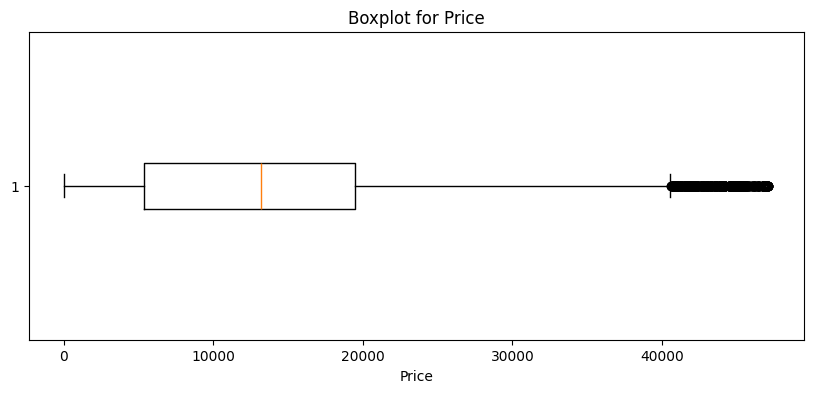

In [29]:
# Create a boxplot after replacing outliers
plt.figure(figsize=(10, 4))
plt.boxplot(dataset['Price'], vert=False)
plt.title('Boxplot for Price')
plt.xlabel('Price')
plt.show()

# drop unimportant featers

In [30]:
dataset.head()

,ID,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,45654403,13328.0,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,12
1,44731507,16621.0,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,8
2,45774419,8467.0,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,2
3,45769185,3607.0,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,0
4,45809263,11726.0,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4


# change change nominal value to numerical

In [31]:
#enc = LabelEncoder()
label_encoder = LabelEncoder()
dataset['CategoryLE'] = label_encoder.fit_transform(dataset['Category'])
dataset['Leather interiorLE'] = label_encoder.fit_transform(dataset['Leather interior'])
dataset['Gear box typeLE'] = label_encoder.fit_transform(dataset['Gear box type'])
dataset['Drive wheelsLE'] = label_encoder.fit_transform(dataset['Drive wheels'])
dataset['Fuel typeLE'] = label_encoder.fit_transform(dataset['Fuel type'])

dataset.head()

,ID,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags,CategoryLE,Leather interiorLE,Gear box typeLE,Drive wheelsLE,Fuel typeLE
0,45654403,13328.0,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,12,4,1,0,0,2
1,44731507,16621.0,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,8,4,0,2,0,5
2,45774419,8467.0,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,2,3,0,3,1,5
3,45769185,3607.0,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,0,4,1,0,0,2
4,45809263,11726.0,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,3,1,0,1,5


In [32]:
features_to_drop = ['Category', 'Leather interior','Gear box type','Drive wheels','Fuel type','ID']
dataset = dataset.drop(columns=features_to_drop)


In [33]:
dataset.head()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,CategoryLE,Leather interiorLE,Gear box typeLE,Drive wheelsLE,Fuel typeLE
0,13328.0,2010,3.5,186005,6.0,12,4,1,0,0,2
1,16621.0,2011,3.0,192000,6.0,8,4,0,2,0,5
2,8467.0,2006,1.3,200000,4.0,2,3,0,3,1,5
3,3607.0,2011,2.5,168966,4.0,0,4,1,0,0,2
4,11726.0,2014,1.3,91901,4.0,4,3,1,0,1,5


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               19237 non-null  float64
 1   Prod. year          19237 non-null  int64  
 2   Engine volume       19237 non-null  float64
 3   Mileage             19237 non-null  int64  
 4   Cylinders           19237 non-null  float64
 5   Airbags             19237 non-null  int64  
 6   CategoryLE          19237 non-null  int32  
 7   Leather interiorLE  19237 non-null  int32  
 8   Gear box typeLE     19237 non-null  int32  
 9   Drive wheelsLE      19237 non-null  int32  
 10  Fuel typeLE         19237 non-null  int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 1.2 MB


# split data set to features and Target

In [35]:
x =dataset.drop('Price',axis=1)
y =dataset['Price']

In [36]:
# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your dataset and transform it
scaled_data = scaler.fit_transform(x)

# Convert the scaled data back to a DataFrame
scaled_dataset = pd.DataFrame(scaled_data, columns=x.columns)
scaled_dataset

,Prod. year,Engine volume,Mileage,Cylinders,Airbags,CategoryLE,Leather interiorLE,Gear box typeLE,Drive wheelsLE,Fuel typeLE
0,0.876543,0.175000,0.000087,0.333333,0.7500,0.4,1.0,0.000000,0.0,0.333333
1,0.888889,0.150000,0.000089,0.333333,0.5000,0.4,0.0,0.666667,0.0,0.833333
2,0.827160,0.065000,0.000093,0.200000,0.1250,0.3,0.0,1.000000,0.5,0.833333
3,0.888889,0.125000,0.000079,0.200000,0.0000,0.4,1.0,0.000000,0.0,0.333333
4,0.925926,0.065000,0.000043,0.200000,0.2500,0.3,1.0,0.000000,0.5,0.833333
...,...,...,...,...,...,...,...,...,...,...
19232,0.740741,0.115649,0.000140,0.200000,0.3125,0.1,1.0,0.333333,1.0,0.000000
19233,0.888889,0.120000,0.000075,0.200000,0.5000,0.9,1.0,0.666667,0.5,0.833333
19234,0.876543,0.100000,0.000054,0.200000,0.2500,0.4,1.0,0.000000,0.5,0.166667
19235,0.839506,0.100000,0.000024,0.200000,0.2500,0.4,1.0,0.000000,0.5,0.166667


# train_test_split for New_df

In [37]:

X_train, X_test, y_train, y_test = train_test_split(scaled_dataset, y, test_size=0.2, random_state=42)

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
predictions = model.predict(X_test)

In [41]:
result_comparison = np.concatenate(
    (
        y_test.values.reshape(len(y_test), 1),
        predictions.reshape(len(predictions), 1)
    ),
    axis=1
)

In [42]:
result_comparison

array([[27284.        , 11085.62898363],
       [10349.        , 10400.02859184],
       [40769.        ,  4735.9568868 ],
       ...,
       [  314.        , 13030.05638081],
       [14069.        , 10852.92717545],
       [15681.        , 16124.99035078]])

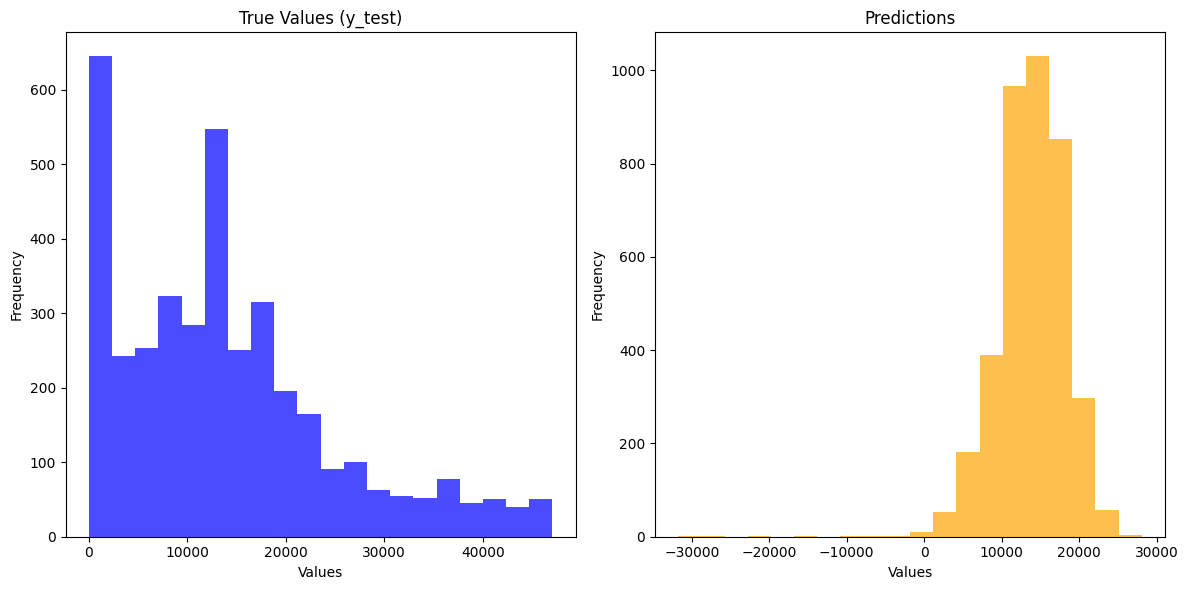

In [43]:
# Create histograms for the true values (y_test) and predictions
plt.figure(figsize=(12, 6))

# Histogram for y_test (true values)
plt.subplot(1, 2, 1)
plt.hist(result_comparison[:, 0], bins=20, color='blue', alpha=0.7)
plt.title('True Values (y_test)')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Histogram for predictions
plt.subplot(1, 2, 2)
plt.hist(result_comparison[:, 1], bins=20, color='orange', alpha=0.7)
plt.title('Predictions')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

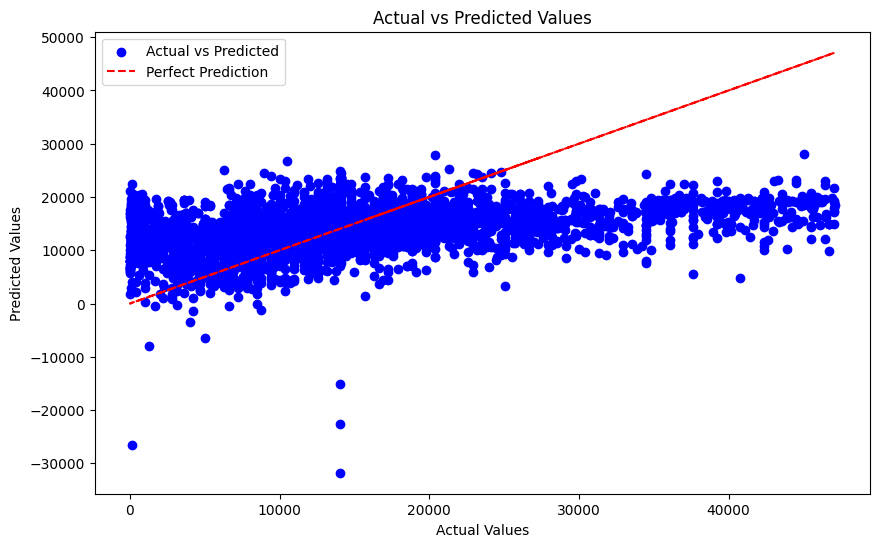

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(result_comparison[:, 0], result_comparison[:, 1], color='blue', label='Actual vs Predicted')
plt.plot(result_comparison[:, 0], result_comparison[:, 0], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [45]:
input_features = np.array([ 0.876543, 0.15000, 0.000098, 0.334433, 0.6000, 1.0,4.0, 0.00000, 0.0, 0.333333]).reshape(1, -1)
# Make the prediction
p= model.predict(input_features)

C:\Users\shehab\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
p

array([11174.53498889])

In [47]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
mse

104220120.19446647

In [48]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
mae

7865.993557412735

# Hourly Vehicle Crossing data for Time Series
# from kaggel:https://www.kaggle.com/datasets/ddosad/vehicle-accidents

In [49]:
dataset=pd.read_csv("Vehicle.csv")
dataset.head()

,Hour,Vehicles
0,1,699
1,2,346
2,3,193
3,4,191
4,5,193


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Hour      1689 non-null   int64
 1   Vehicles  1689 non-null   int64
dtypes: int64(2)
memory usage: 26.5 KB


 # train_test_split

In [51]:
features= dataset.iloc[:,:-1]
target  = dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [52]:
reg=LinearRegression()

In [53]:
reg.fit(X_train,y_train)

LinearRegression()

In [54]:
prediction=reg.predict(X_test)

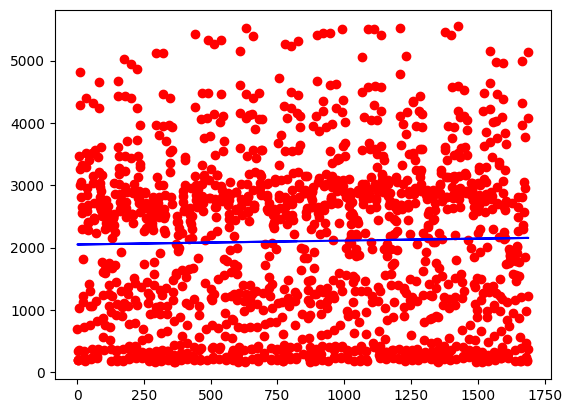

In [55]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='b')

plt.show()

In [56]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, prediction)
mse

1795580.2766212623

In [57]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, prediction)
mae

1147.0651227035612